In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

crypto_currencies= '''
Bitcoin: BTC
Bitcoin: Cash BCH
Blackcoin: BLK
Bytecoin: BCN
Dash: DASH
Dogecoin: DOGE
Emercoin: EMC
Ethereum: ETH
Litecoin: LTC
Monero: XMR
Peercoin: PPC
Primecoin: XPM
Reddcoin: RDD
Ripple: XRP
Zcash: ZEC'''
fiat_currencies = '''
US Dollar: USD
Euro EUR:
Russian Ruble: RUR
Ukrainian Hryvnia: UAH'''
crypto = input('Type crypto currency: ')
fiat = input('Type currency: ')

data = requests.get('https://api.cryptonator.com/api/full/'+crypto+'-'+fiat).json()
markets = pd.DataFrame(data['ticker']['markets'])
high_market = markets.loc[markets['price'] == markets['price'].max()]
low_market = markets.loc[markets['price'] == markets['price'].min()]
print('High market name: ' + high_market.iloc[0]['market'])
print('Low market price: ' + high_market.iloc[0]['price']+fiat)
print('High market name: ' + low_market.iloc[0]['market'])
print('Low market price: ' + low_market.iloc[0]['price']+fiat)
markets

Type crypto currency: eth
Type currency: eur
High market name: Exmo
Low market price: 317.02000000eur
High market name: Kraken
Low market price: 304.41000000eur


,market,price,volume
0,BitFinex,305.17419240,775.920113
1,Cex.io,306.52000000,276.265793
2,Exmo,317.02000000,921.024493
3,Kraken,304.41000000,38393.133195
4,wexnz,314.61662000,3652.079960


Text(0,0.5,'Volume')

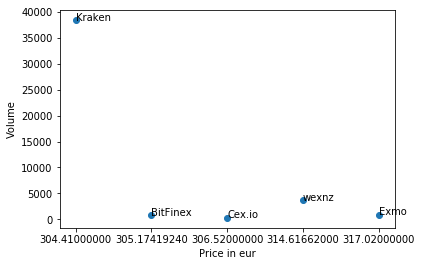

In [29]:
y=markets['volume']
z=markets['price']
n=markets['market']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))
plt.xlabel('Price in '+ fiat)
plt.ylabel('Volume')